In [10]:
import sys
if(not(sys.path[0] == './dynamics_sim-master/games')):
  sys.path.insert(0, './dynamics_sim-master/games')
sys.path

['./dynamics_sim-master/games',
 './dynamics_sim-master',
 '/Users/sudarshansarolkar/Downloads/gt2021/dynamics_sim/dynamics_sim-master',
 '/Users/sudarshansarolkar/.vscode/extensions/ms-toolsai.jupyter-2021.9.1001312534/pythonFiles',
 '/Users/sudarshansarolkar/.vscode/extensions/ms-toolsai.jupyter-2021.9.1001312534/pythonFiles/lib/python',
 '/opt/homebrew/Cellar/python@3.9/3.9.7/Frameworks/Python.framework/Versions/3.9/lib/python39.zip',
 '/opt/homebrew/Cellar/python@3.9/3.9.7/Frameworks/Python.framework/Versions/3.9/lib/python3.9',
 '/opt/homebrew/Cellar/python@3.9/3.9.7/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload',
 '',
 '/opt/homebrew/lib/python3.9/site-packages',
 '/opt/homebrew/lib/python3.9/site-packages/IPython/extensions',
 '/Users/sudarshansarolkar/.ipython']

In [15]:
from games.game import Game
from wrapper import GameDynamicsWrapper
from games.game import SymmetricNPlayerGame
from wrapper import GameDynamicsWrapper
from wrapper import VariedGame
from dynamics.replicator import Replicator
from dynamics.wright_fisher import WrightFisher
from dynamics.moran import Moran
import os
class CostlySignaling(Game):
    """ Class that defines a version of the costly signaling game. See : Hoffman, Moshe and Erez Yoeli, Costly Signaling," University Lecture 2015.
    """
    DEFAULT_PARAMS = dict(lCost=100, hCost=1, a=5, aHigh=100, aLow=-10, lProp=2, hProp=1, bias_strength=0)
    PLAYER_LABELS = ('Low Sender', 'High Sender', 'Receiver')
    STRATEGY_LABELS = (('No', 'Low', 'Medium', 'High'),
                       ('No', 'Low', 'Medium', 'High'),
                       ('Accept all', 'Accept Low', 'Accept Medium', 'Accept High', 'Reject All'))
    EQUILIBRIA_LABELS = ('Pooling with rejection', 'Pooling with acceptance', 'Efficient separating', 'Ostentatious separating', 'Simple Separating')

    def __init__(self, lCost, hCost, a, aHigh, aLow, lProp, hProp, bias_strength, equilibrium_tolerance=0.2):
        lProp, hProp = lProp/(lProp+hProp), hProp/(lProp+hProp)
        lProp /= 2
        hProp /= 2

        payoff_matrix_p1 = [[[0 for x in range(5)] for x in range(4)] for x in range(4)]
        for i1, lowSenderStrat in enumerate(payoff_matrix_p1):
            for i2, highSenderStrat in enumerate(lowSenderStrat):
                for i3, payoff in enumerate(highSenderStrat):
                    if i1 >= i3:
                        payoff_matrix_p1[i1][i2][i3] += a
                    payoff_matrix_p1[i1][i2][i3] -= lCost * i1

        payoff_matrix_p2 = [[[0 for x in range(5)] for x in range(4)] for x in range(4)]
        for i1, lowSenderStrat in enumerate(payoff_matrix_p1):
            for i2, highSenderStrat in enumerate(lowSenderStrat):
                for i3, payoff in enumerate(highSenderStrat):
                    if i2 >= i3:
                        payoff_matrix_p2[i1][i2][i3] += a
                    payoff_matrix_p2[i1][i2][i3] -= hCost * i2

        payoff_matrix_p3 = [[[0 for x in range(5)] for x in range(4)] for x in range(4)]
        for i1, lowSenderStrat in enumerate(payoff_matrix_p1):
            for i2, highSenderStrat in enumerate(lowSenderStrat):
                for i3, payoff in enumerate(highSenderStrat):
                    if i1 >= i3:#Low sender accepted
                        payoff_matrix_p3[i1][i2][i3] += aLow * lProp
                    if i2 >= i3:
                        payoff_matrix_p3[i1][i2][i3] += aHigh * hProp

        payoff_matrix = [payoff_matrix_p1, payoff_matrix_p2, payoff_matrix_p3]
        player_dist = (lProp, hProp, 1/2)
        super(CostlySignaling, self).__init__(payoff_matrices=payoff_matrix, player_frequencies=player_dist, bias_strength=bias_strength, equilibrium_tolerance=equilibrium_tolerance)

    @classmethod
    def classify(cls, params, state, tolerance):
        threshold = 1-tolerance

        if state[2][4] >= threshold:
            return 0#Receiver rejects all
        elif state[2][0] >= threshold:
            return 1#Receiver accepts all
        elif state[0][0] >= threshold and state[1][2] >= threshold:
            return 2#Efficient separating
        elif state[0][0] >= threshold and state[1][3] >= threshold:
            return 3#Ostentatious
        elif state[0][0] >= threshold and state[1][1] >= threshold:
            return 4#Simple separating
        else:
            return super(CostlySignaling, cls).classify(params, state, tolerance)


/Users/sudarshansarolkar/Downloads/gt2021/dynamics_sim/dynamics_sim-master/dynamics/dynamics.py:196: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  strategies.append(np.array([r[j] for j in range(self.number_groups)]))
/Users/sudarshansarolkar/Downloads/gt2021/dynamics_sim/dynamics_sim-master/dynamics/dynamics.py:197: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  payoffs.append(np.array([p[j] for j in range(self.number_groups)]))


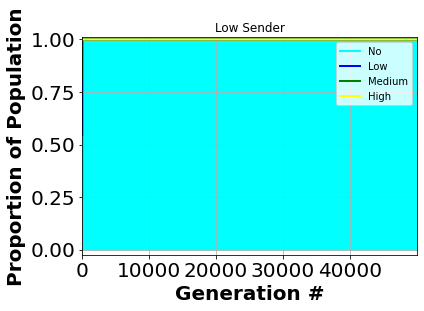

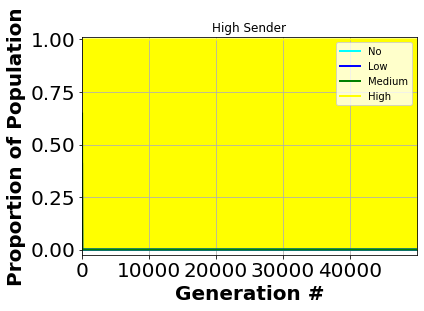

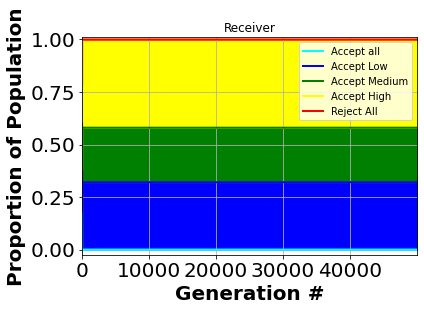

In [17]:
from wrapper import GameDynamicsWrapper
from games.game import SymmetricNPlayerGame
from wrapper import GameDynamicsWrapper
from wrapper import VariedGame
from dynamics.replicator import Replicator
from dynamics.wright_fisher import WrightFisher
from dynamics.moran import Moran
from dynamics.dynamics import DynamicsSimulator
#s = GameDynamicsWrapper(Coordination,WrightFisher)
#s = GameDynamicsWrapper(CoordinationBattle,WrightFisher)

def test_single_simulation():
    s = GameDynamicsWrapper(CostlySignaling, WrightFisher)
    s.simulate(num_gens=50000, graph=dict(area=True))
test_single_simulation()    